In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
file_path_2017 = 'bike_rent(2017).xlsx'
file_path_2018 = './bike_rent(2018_2019.03).csv'

# bike_data_2017 = pd.read_excel(file_path_2017, encoding='CP949', parse_dates=True)
bike_data_2017 = pd.read_excel(file_path_2017, encoding='CP949', index_col='대여 일자 / 월', parse_dates=True)
bike_data_2018 = pd.read_csv(file_path_2018, encoding='CP949', index_col='대여일자', parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'bike_rent(2017).xlsx'

In [3]:
bike_data_2017.head()

,대여소 그룹,대여소 명,대여 건수
대여 일자 / 월,,,
2017-01-01,그룹명 없음,대여소명 없음,0
2017-01-01,광진구,500. 어린이대공원역 3번출구 앞,20
2017-01-01,광진구,501. 광진구의회 앞,10
2017-01-01,광진구,502. 뚝섬유원지역 1번출구 앞,9
2017-01-01,광진구,503. 더샵스타시티 C동 앞,9


In [4]:
bike_data_2018.head()

,대여건수
대여일자,
2018-01-01,4950
2018-01-02,7136
2018-01-03,7156
2018-01-04,7102
2018-01-05,7705


In [38]:
bike_data_grp_2017 = bike_data_2017.groupby(pd.Grouper(freq='M'))['대여 건수'].sum()
bike_data_grp_2017.index = pd.Series(bike_data_grp_2017.index).map(lambda dt: dt.strftime('%m'))

bike_data_grp_2018 = bike_data_2018.groupby(pd.Grouper(freq='M'))['대여건수'].sum()
bike_data_grp_2019 = bike_data_grp_2018[12:]
bike_data_grp_2018 = bike_data_grp_2018[:12]
bike_data_grp_2018.index = pd.Series(bike_data_grp_2018.index).map(lambda dt: dt.strftime('%m'))
bike_data_grp_2019.index = pd.Series(bike_data_grp_2019.index).map(lambda dt: dt.strftime('%m'))

Text(0.5,0,'month')

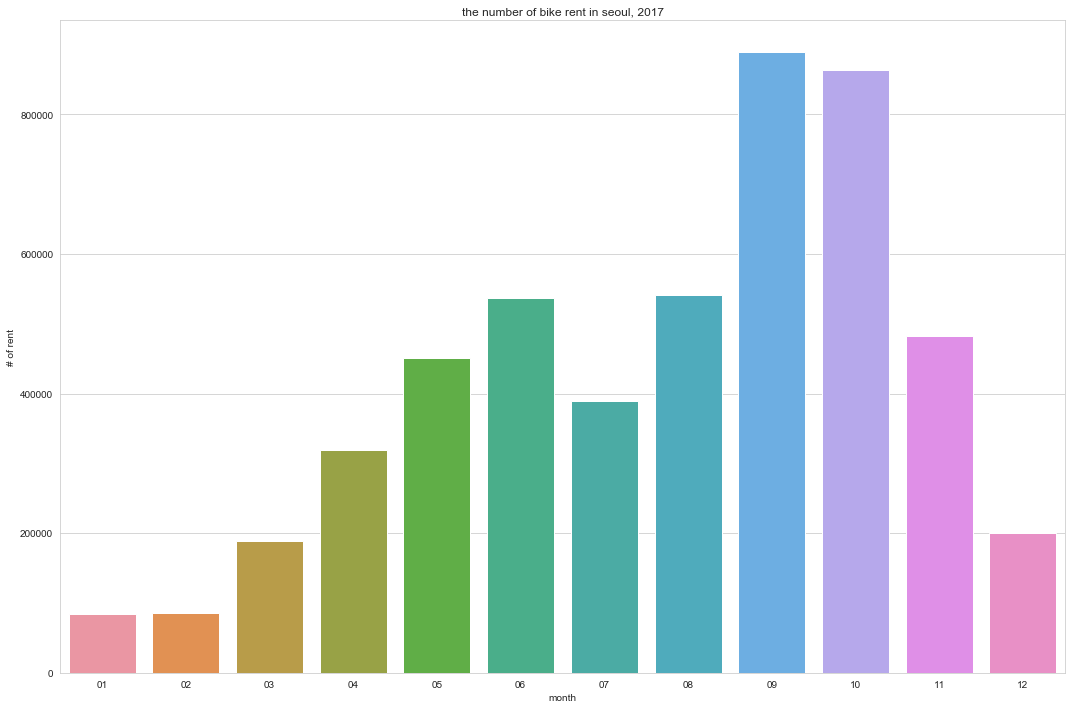

In [39]:
plt.figure(figsize=(18, 12))
# sns.lineplot(data=bike_data_grp)
sns.barplot(x=bike_data_grp_2017.index, y=bike_data_grp_2017)
plt.title('the number of bike rent in seoul, 2017')
plt.ylabel('# of rent')
plt.xlabel('month')

Text(0.5,0,'month')

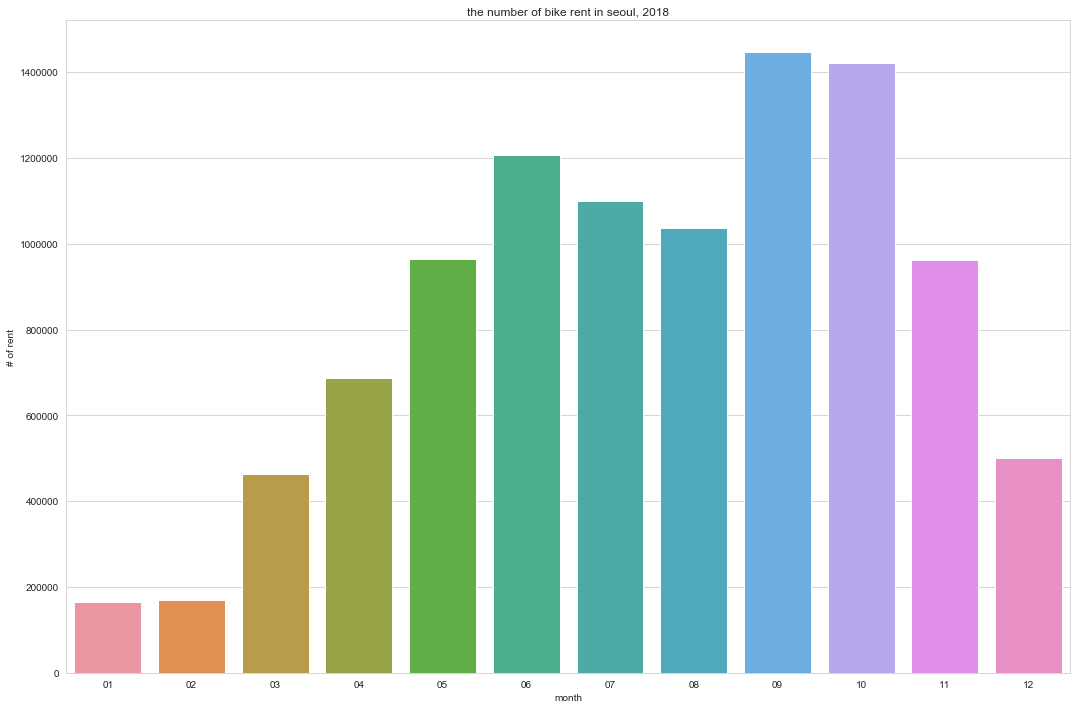

In [40]:
plt.figure(figsize=(18, 12))
# sns.lineplot(data=bike_data_grp)
sns.barplot(x=bike_data_grp_2018.index, y=bike_data_grp_2018)
plt.title('the number of bike rent in seoul, 2018')
plt.ylabel('# of rent')
plt.xlabel('month')

In [41]:
bike_data_grp_2019

대여일자
01    495573
02    471543
03    904819
Name: 대여건수, dtype: int64

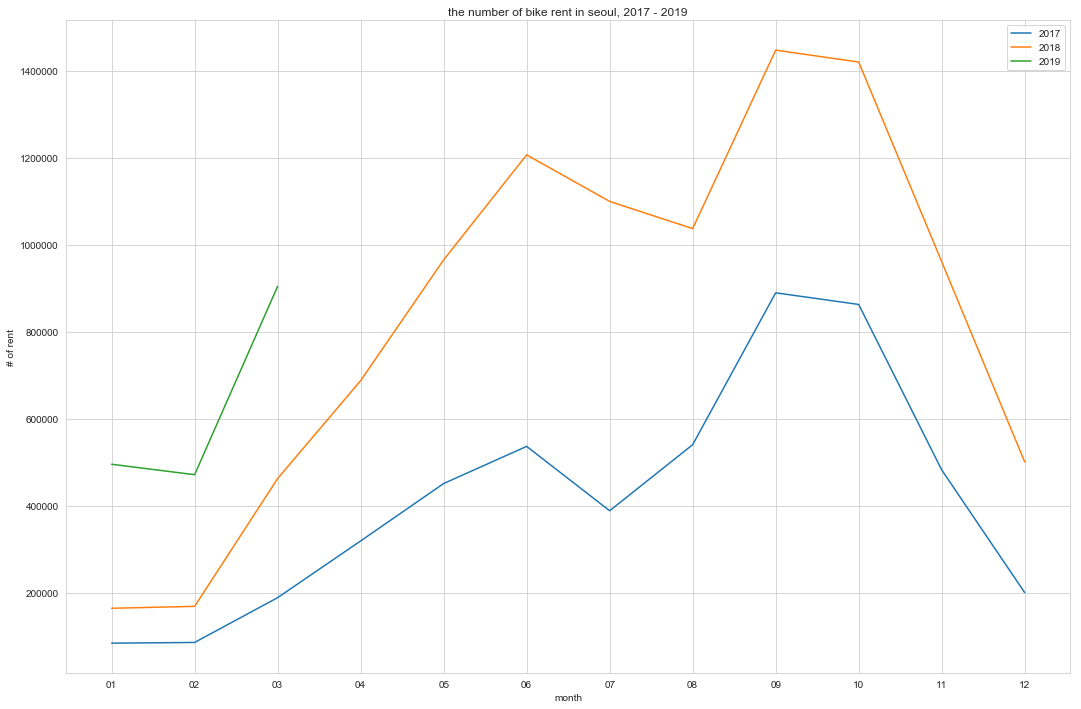

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
# sns.lineplot(data=bike_data_grp)
sns.lineplot(data=bike_data_grp_2017, label='2017')
sns.lineplot(data=bike_data_grp_2018, label='2018')
sns.lineplot(data=bike_data_grp_2019, label='2019')
plt.title('the number of bike rent in seoul, 2017 - 2019')
plt.ylabel('# of rent')
plt.xlabel('month')

plt.legend()